In [60]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt

In [61]:
fns = netCDF4.Dataset('northwardvel.nc')
few = netCDF4.Dataset('eastwardvel.nc')
fsal = netCDF4.Dataset('salinity.nc')

In [62]:
few["longitude"][:]

masked_array(data=[-24.875, -24.625, -24.375, -24.125, -23.875, -23.625,
                   -23.375, -23.125, -22.875, -22.625, -22.375, -22.125,
                   -21.875, -21.625, -21.375, -21.125, -20.875, -20.625,
                   -20.375, -20.125, -19.875, -19.625, -19.375, -19.125,
                   -18.875, -18.625, -18.375, -18.125, -17.875, -17.625,
                   -17.375, -17.125, -16.875, -16.625, -16.375, -16.125,
                   -15.875, -15.625, -15.375, -15.125, -14.875, -14.625,
                   -14.375, -14.125, -13.875, -13.625, -13.375, -13.125,
                   -12.875, -12.625, -12.375, -12.125, -11.875, -11.625,
                   -11.375, -11.125, -10.875, -10.625, -10.375, -10.125,
                    -9.875,  -9.625,  -9.375,  -9.125,  -8.875,  -8.625,
                    -8.375,  -8.125,  -7.875,  -7.625,  -7.375,  -7.125,
                    -6.875,  -6.625,  -6.375,  -6.125,  -5.875,  -5.625,
                    -5.375,  -5.125,  -4.875,  -4.6

In [63]:
fsal["lon"][:] - 360

masked_array(data=[-25.  , -24.75, -24.5 , -24.25, -24.  , -23.75, -23.5 ,
                   -23.25, -23.  , -22.75, -22.5 , -22.25, -22.  , -21.75,
                   -21.5 , -21.25, -21.  , -20.75, -20.5 , -20.25, -20.  ,
                   -19.75, -19.5 , -19.25, -19.  , -18.75, -18.5 , -18.25,
                   -18.  , -17.75, -17.5 , -17.25, -17.  , -16.75, -16.5 ,
                   -16.25, -16.  , -15.75, -15.5 , -15.25, -15.  , -14.75,
                   -14.5 , -14.25, -14.  , -13.75, -13.5 , -13.25, -13.  ,
                   -12.75, -12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25,
                   -11.  , -10.75, -10.5 , -10.25, -10.  ,  -9.75,  -9.5 ,
                    -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,  -8.  ,  -7.75,
                    -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,  -6.  ,
                    -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
                    -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,
                    -2.25

In [64]:
x, y, ewct, nsct = np.asarray(few.variables["longitude"][:]), np.asarray(few.variables["latitude"][:]), np.asarray(few.variables["uo"][:])[:, 0, :, :], np.asarray(fns.variables["vo"][:])[:, 0, :, :]
sal = np.asarray(fsal.variables["so"][:])[:, 0, :, :]

In [65]:
ind = np.where(ewct > 10**5)
ewct[ind] = 0

ind = np.where(nsct > 10**5)
nsct[ind] = 0

ind = np.where(sal < 0)
sal[ind] = 0

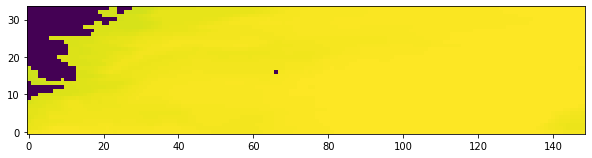

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.quiver(x, y, ewct[1, :, :], nsct[1, :, :])
ax.imshow(sal[1, 1:, 1:], origin='lower')
plt.show()
plt.close(fig)

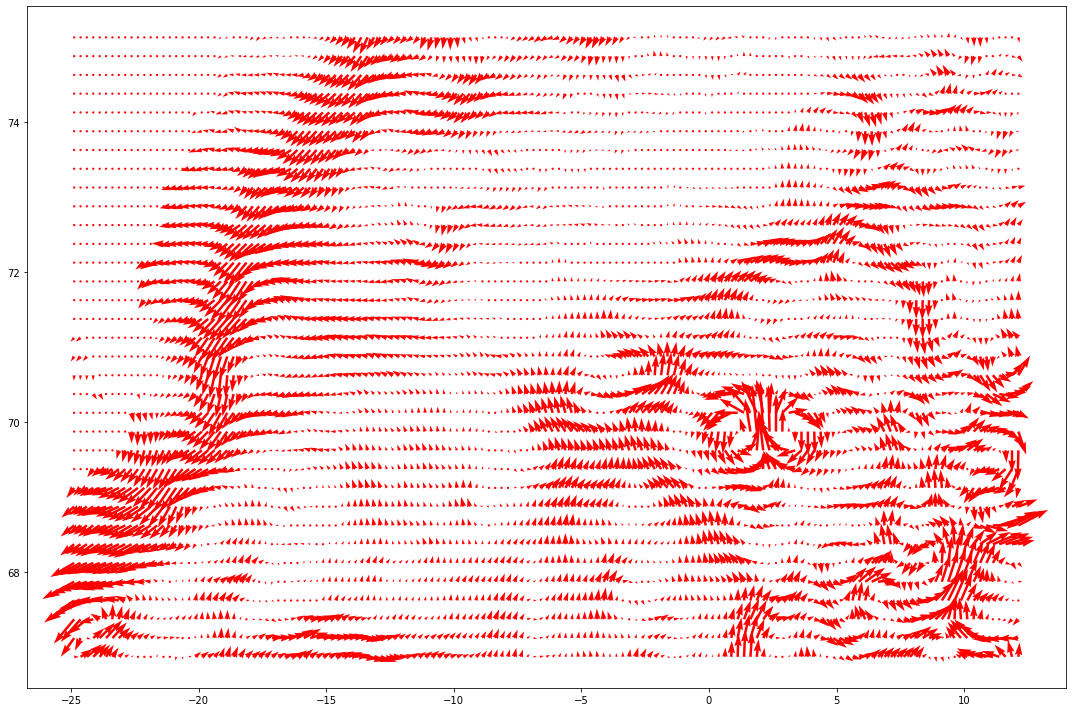

In [6]:
%matplotlib inline
from matplotlib import animation, rcParams
from IPython.display import HTML
rcParams['animation.writer'] = 'ffmpeg'


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
Q = ax.quiver(x, y, ewct[0, :, :], nsct[0, :, :], color='r')

def update_quiver(frame):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    Q.set_UVC(x, y, ewct[frame, :, :], nsct[frame, :, :])

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, frames=30, interval=1)
fig.tight_layout()
plt.show()

In [7]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [8]:
few.close()
fns.close()